# BPL_TEST2_Fedbatch - demo

In [1]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


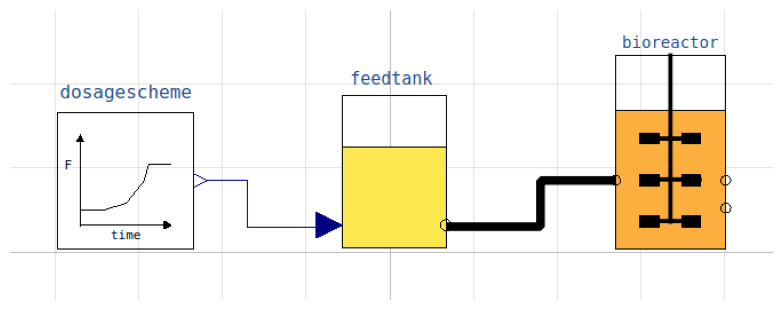

In [3]:
process_diagram()

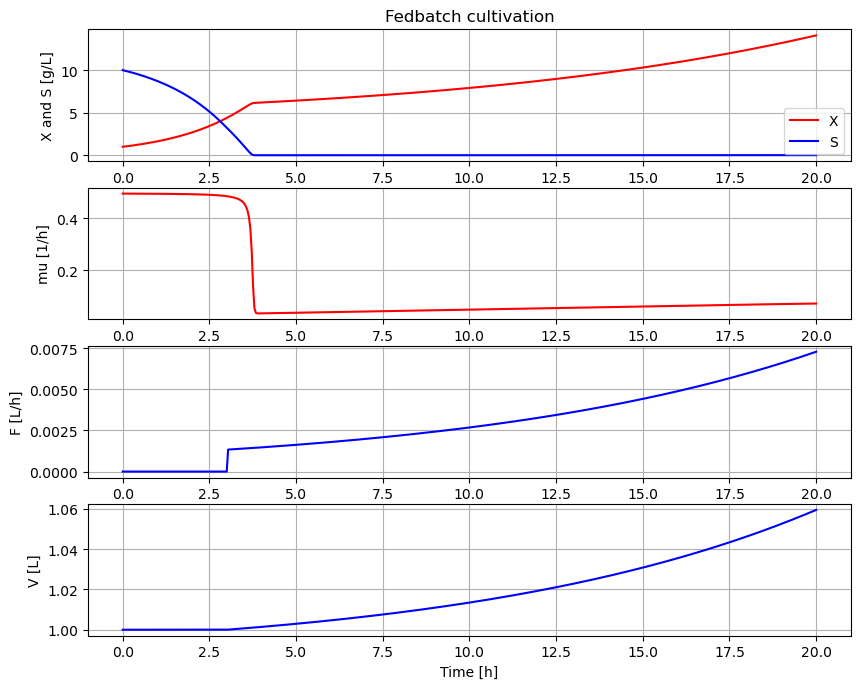

In [4]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu(20)

In [5]:
disp(mode='long')

bioreactor.V_start : V_start : 1.0
bioreactor.m_start[1] : VX_start : 0.0
bioreactor.m_start[2] : VS_start : 0.0
bioreactor.culture.Y : Y : 0.5
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.c_in[2] : feedtank.S_in : 0.0
feedtank.V_start : feedtank.V_start : 100.0
dosagescheme.mu_feed : mu_feed : 0.2
dosagescheme.t_startExp : t_startExp : 2.0
dosagescheme.F_startExp : F_startExp : 0.12
dosagescheme.F_max : F_max : 3.0


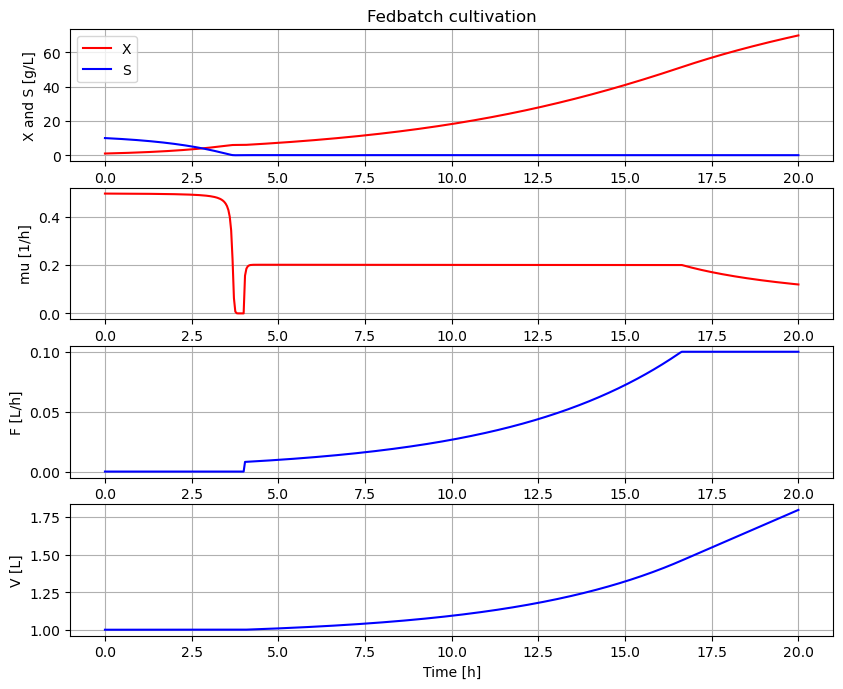

In [6]:
# A more typical feed scheme for the culture at hand
newplot(plotType='TimeSeries')
par(t_startExp=4, F_startExp=0.008, mu_feed=0.2, F_max=0.1)
simu(20)

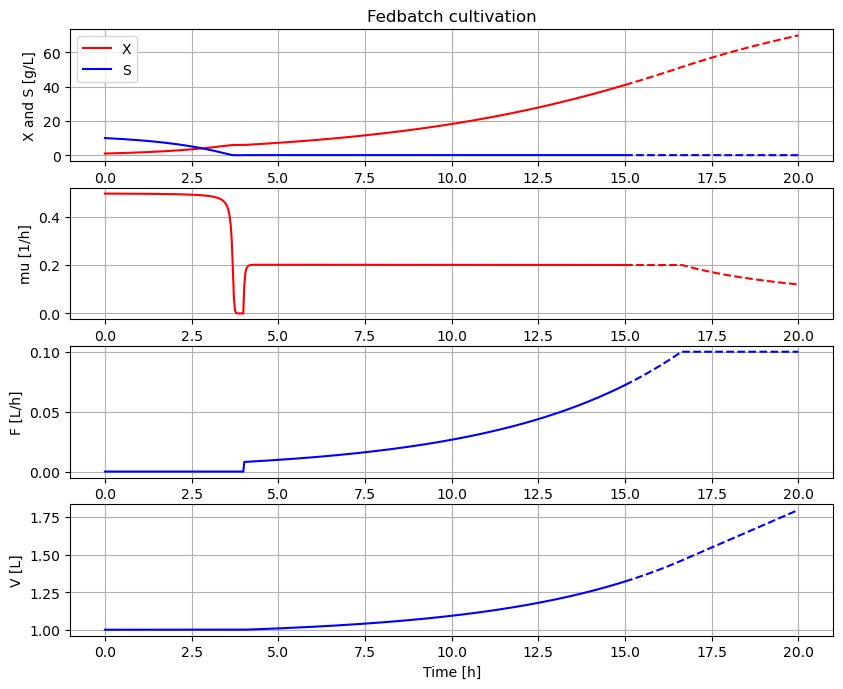

In [7]:
# Test function simu(mode='cont')
newplot()
simu(15)
simu(5,'cont')

In [8]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [9]:
disp('Y', mode='long')

bioreactor.culture.Y : Y : 0.5


In [10]:
describe('mu')

Cell specific growth rate variable : 0.12 [ 1/h ]


In [11]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank', 'MSL']


In [12]:
describe('MSL')

MSL: RealInput, RealOutput


In [13]:
system_info()


System information
 -OS: Windows
 -Python: 3.12.3
 -Scipy: not installed in the notebook
 -FMPy: 0.3.20
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: CS
 -Name: BPL.Examples_TEST2.Fedbatch
 -Generated: 2024-11-06T16:31:37
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.3.0
 -Interaction: FMU-explore for FMPy version 1.0.1
